# **Machine Learning: Project Part 1**

---

**Author: Damien Farrell**

---

In [12]:
# Imports

import os
import numpy as np
from dotenv import load_dotenv
from pyannote.audio import Pipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook
import whisper
from transformers import pipeline
import torch
from tqdm import tqdm

In [2]:
# Environment Variables
load_dotenv()
HF_API_KEY = os.getenv("HF_API_KEY")
assert HF_API_KEY, "Please set your Hugging Face API key in the HF_API_KEY environment variable."

# Audio File Path
AUDIO_FILE_PATH = "./audio/TrumpHarrisDebate.wav"
assert AUDIO_FILE_PATH, "Please place your audio in a folder called 'audio'. Note: use backslashes if on Windows"

## **Project Part 1: Interview/Debate Audio Analysis**

> 1. **Performs Speaker Diarisation Analysis**  
>    - Uses pre-built models to identify who spoke and when.  
>    - Outputs time segments for each speaker and calculates total speaking time.
> <br><br>
> 2. **Performs Speech to Text Analysis**  
>    - Transcribes the audio for each speaker.  
>    - Combines speaker labels with the transcript (e.g., “[Speaker 1] …”).  
>    - Allows for further analysis, such as word counts or word frequency per speaker.
> <br><br>
> 3. **Leverage a Large Language Model**  
>    - Once the transcript is annotated, the notebook can query a large language model for sentiment or ideological analysis.  
>    - Could identify speaker names or approximate political leanings based on transcript content.
> <br><br>
> 4. **Testing & Evaluation**  
>    - An audio file of the “Harris vs. Trump 2024 US Presidential Debate” will be provided for initial testing.  
>    - A more complex file (with additional speakers or speakers of similar gender) should be used for further evaluation.  
>    - The performance of each component should be documented and assessed.
> <br><br>


---

### **1. Performs Speaker Diarisation Analysis** 

---

In [3]:
# instantiate the pipeline
pipeline = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.1",
  use_auth_token="HF_API_KEY")

In [4]:
# run the pipeline on an audio file
with ProgressHook() as hook:
    diarisation = pipeline(AUDIO_FILE_PATH, hook=hook)

Output()

/home/damien/Documents/ATU/machine-learning/.venv/lib/python3.12/site-packages/pyannote/audio/models/blocks/pooling
.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction 
factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  std = sequences.std(dim=-1, correction=1)

In [5]:
print(diarisation)

[ 00:00:01.836 -->  00:00:03.034] A SPEAKER_02
[ 00:00:03.152 -->  00:00:04.671] B SPEAKER_02
[ 00:00:04.806 -->  00:00:05.211] C SPEAKER_02
[ 00:00:06.679 -->  00:00:10.037] D SPEAKER_00
[ 00:00:10.257 -->  00:00:20.449] E SPEAKER_01
[ 00:00:20.922 -->  00:00:29.697] F SPEAKER_02
[ 00:00:30.068 -->  00:00:52.512] G SPEAKER_01
[ 00:00:52.799 -->  00:00:55.600] H SPEAKER_02
[ 00:00:56.039 -->  00:01:22.566] I SPEAKER_02
[ 00:01:23.005 -->  00:01:37.214] J SPEAKER_01
[ 00:01:37.214 -->  00:01:37.281] K SPEAKER_00
[ 00:01:37.669 -->  00:01:42.512] L SPEAKER_00
[ 00:01:40.352 -->  00:01:41.196] M SPEAKER_02
[ 00:01:43.187 -->  00:01:45.060] N SPEAKER_02
[ 00:01:46.259 -->  00:01:49.245] O SPEAKER_00
[ 00:01:48.385 -->  00:01:55.607] P SPEAKER_01
[ 00:01:49.887 -->  00:01:51.861] Q SPEAKER_00
[ 00:01:55.624 -->  00:02:08.230] R SPEAKER_00
[ 00:02:08.230 -->  00:02:11.267] S SPEAKER_02
[ 00:02:11.892 -->  00:02:19.637] T SPEAKER_02
[ 00:02:20.076 -->  00:02:26.252] U SPEAKER_02
[ 00:02:26.70

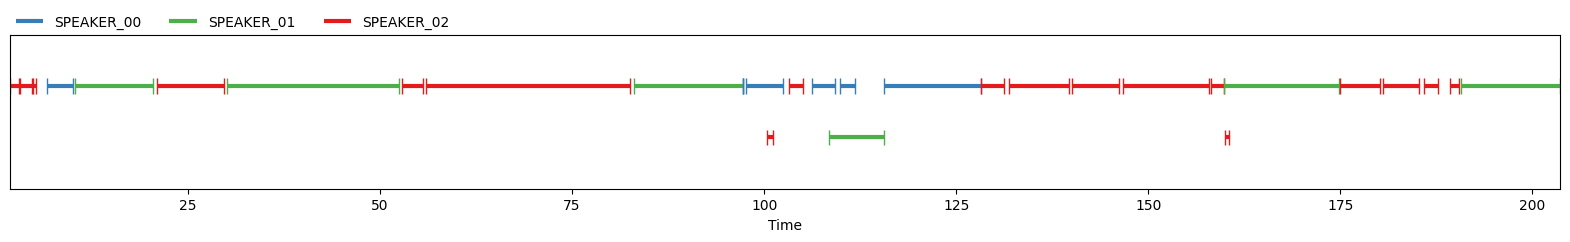

In [6]:
diarisation.support()

---

### **2. Performs Speech to Text Analysis** 

---

In [7]:
model = whisper.load_model("base.en")
result = model.transcribe(AUDIO_FILE_PATH, verbose=False, fp16=False)
transcript = result["text"]

/home/damien/Documents/ATU/machine-learning/.venv/lib/python3.12/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load

In [8]:
transcript

" Kamala Harris, is that good to be? You see, have fun. Thank you. Welcome to you both. It's wonderful to have you. It's an honor to have you both here tonight. We have inflation like very few people have ever seen before, probably the worst in our nation's history. This has been a disaster for people, for the middle class, but for every class. Donald Trump left us the worst unemployment since the Great Depression. And what we have done is clean up Donald Trump's mess. She's a Marxist. Everybody knows she's a Marxist. Her father's a Marxist professor in economics, and he taught her well. But her vice presidential pick says abortion in the ninth month is absolutely fine. He also says execution after birth. It's execution, no longer abortion because the baby is born is okay, and that's not okay with me. One does not have to abandon their faith. For deeply held beliefs to agree. The government and Donald Trump certainly should not be telling a woman what to do with her body. Pregnant wome

In [26]:
for turn, _, speaker in diarisation.itertracks(yield_label=True):
    print(f"{turn.start:.3f} --> {turn.end:.3f} {speaker}")

1.837 --> 3.035 SPEAKER_02
3.153 --> 4.672 SPEAKER_02
4.807 --> 5.212 SPEAKER_02
6.680 --> 10.038 SPEAKER_00
10.257 --> 20.450 SPEAKER_01
20.922 --> 29.697 SPEAKER_02
30.068 --> 52.512 SPEAKER_01
52.799 --> 55.600 SPEAKER_02
56.039 --> 82.567 SPEAKER_02
83.005 --> 97.214 SPEAKER_01
97.214 --> 97.282 SPEAKER_00
97.670 --> 102.513 SPEAKER_00
100.353 --> 101.197 SPEAKER_02
103.188 --> 105.061 SPEAKER_02
106.259 --> 109.246 SPEAKER_00
108.385 --> 115.608 SPEAKER_01
109.887 --> 111.862 SPEAKER_00
115.625 --> 128.230 SPEAKER_00
128.230 --> 131.268 SPEAKER_02
131.892 --> 139.638 SPEAKER_02
140.077 --> 146.253 SPEAKER_02
146.708 --> 157.863 SPEAKER_02
158.116 --> 159.854 SPEAKER_02
159.854 --> 174.788 SPEAKER_01
159.989 --> 160.478 SPEAKER_02
174.940 --> 180.121 SPEAKER_02
180.593 --> 185.285 SPEAKER_02
185.858 --> 187.765 SPEAKER_02
189.284 --> 190.415 SPEAKER_02
190.752 --> 203.594 SPEAKER_01


I need to use a github repo called Whisper X in order to merge the speaker diarisation and the transcript.

In [29]:
import whisperx
import gc 

device = "cpu" 
audio_file = AUDIO_FILE_PATH
batch_size = 4 # reduce if low on GPU mem
compute_type = "int8" # change to "int8" if low on GPU mem (may reduce accuracy)
audio = whisperx.load_audio(AUDIO_FILE_PATH)


print(result["segments"]) # before alignment

[{'id': 0, 'seek': 0, 'start': 0.0, 'end': 3.7600000000000002, 'text': ' Kamala Harris, is that good to be?', 'tokens': [50363, 12670, 6081, 10026, 11, 318, 326, 922, 284, 307, 30, 50551], 'temperature': 0.0, 'avg_logprob': -0.23759510206139606, 'compression_ratio': 1.6124031007751938, 'no_speech_prob': 0.08816885948181152}, {'id': 1, 'seek': 0, 'start': 3.7600000000000002, 'end': 4.76, 'text': ' You see, have fun.', 'tokens': [50551, 921, 766, 11, 423, 1257, 13, 50601], 'temperature': 0.0, 'avg_logprob': -0.23759510206139606, 'compression_ratio': 1.6124031007751938, 'no_speech_prob': 0.08816885948181152}, {'id': 2, 'seek': 0, 'start': 4.76, 'end': 6.76, 'text': ' Thank you.', 'tokens': [50601, 6952, 345, 13, 50701], 'temperature': 0.0, 'avg_logprob': -0.23759510206139606, 'compression_ratio': 1.6124031007751938, 'no_speech_prob': 0.08816885948181152}, {'id': 3, 'seek': 0, 'start': 6.76, 'end': 7.76, 'text': ' Welcome to you both.', 'tokens': [50701, 19134, 284, 345, 1111, 13, 50751], 

In [30]:
# 2. Align whisper output
model_a, metadata = whisperx.load_align_model(language_code=result["language"], device=device)
result = whisperx.align(result["segments"], model_a, metadata, audio, device, return_char_alignments=False)

print(result["segments"]) # after alignment

[{'start': 1.85, 'end': 3.7, 'text': ' Kamala Harris, is that good to be?', 'words': [{'word': 'Kamala', 'start': np.float64(1.85), 'end': np.float64(2.192), 'score': np.float64(0.604)}, {'word': 'Harris,', 'start': np.float64(2.212), 'end': np.float64(2.513), 'score': np.float64(0.899)}, {'word': 'is', 'start': np.float64(2.533), 'end': np.float64(2.574), 'score': np.float64(0.0)}, {'word': 'that', 'start': np.float64(3.157), 'end': np.float64(3.398), 'score': np.float64(0.624)}, {'word': 'good', 'start': np.float64(3.418), 'end': np.float64(3.539), 'score': np.float64(0.262)}, {'word': 'to', 'start': np.float64(3.559), 'end': np.float64(3.599), 'score': np.float64(0.02)}, {'word': 'be?', 'start': np.float64(3.619), 'end': np.float64(3.7), 'score': np.float64(0.483)}]}, {'start': 3.842, 'end': 4.556, 'text': ' You see, have fun.', 'words': [{'word': 'You', 'start': np.float64(3.842), 'end': np.float64(3.964), 'score': np.float64(0.872)}, {'word': 'see,', 'start': np.float64(4.005), 'e

In [32]:
# 3. Assign speaker labels
diarize_model = whisperx.DiarizationPipeline(use_auth_token=HF_API_KEY, device=device)



In [33]:
diarize_model

In [35]:
# add min/max number of speakers if known
diarize_segments = diarize_model(audio)
# diarize_model(audio, min_speakers=min_speakers, max_speakers=max_speakers)

result = whisperx.assign_word_speakers(diarize_segments, result)
print(diarize_segments)
print(result["segments"]) # segments are now assigned speaker IDs

/home/damien/Documents/ATU/machine-learning/.venv/lib/python3.12/site-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  std = sequences.std(dim=-1, correction=1)


                              segment label     speaker       start  \
0   [ 00:00:01.836 -->  00:00:02.832]     A  SPEAKER_01    1.836594   
1   [ 00:00:02.933 -->  00:00:03.034]     B  SPEAKER_01    2.933469   
2   [ 00:00:03.186 -->  00:00:04.671]     C  SPEAKER_01    3.186594   
3   [ 00:00:04.772 -->  00:00:05.228]     D  SPEAKER_01    4.772844   
4   [ 00:00:06.679 -->  00:00:10.037]     E  SPEAKER_00    6.679719   
5   [ 00:00:10.257 -->  00:00:20.449]     F  SPEAKER_02   10.257219   
6   [ 00:00:20.922 -->  00:00:29.697]     G  SPEAKER_01   20.922219   
7   [ 00:00:30.068 -->  00:00:52.495]     H  SPEAKER_02   30.068469   
8   [ 00:00:52.495 -->  00:00:52.512]     I  SPEAKER_01   52.495344   
9   [ 00:00:52.782 -->  00:00:55.600]     J  SPEAKER_01   52.782219   
10  [ 00:00:56.039 -->  00:01:22.549]     K  SPEAKER_01   56.039094   
11  [ 00:01:23.005 -->  00:01:37.214]     L  SPEAKER_02   83.005344   
12  [ 00:01:37.214 -->  00:01:37.315]     M  SPEAKER_00   97.214094   
13  [ 

In [36]:
result

{'segments': [{'start': 1.85,
   'end': 3.7,
   'text': ' Kamala Harris, is that good to be?',
   'words': [{'word': 'Kamala',
     'start': np.float64(1.85),
     'end': np.float64(2.192),
     'score': np.float64(0.604),
     'speaker': 'SPEAKER_01'},
    {'word': 'Harris,',
     'start': np.float64(2.212),
     'end': np.float64(2.513),
     'score': np.float64(0.899),
     'speaker': 'SPEAKER_01'},
    {'word': 'is',
     'start': np.float64(2.533),
     'end': np.float64(2.574),
     'score': np.float64(0.0),
     'speaker': 'SPEAKER_01'},
    {'word': 'that',
     'start': np.float64(3.157),
     'end': np.float64(3.398),
     'score': np.float64(0.624),
     'speaker': 'SPEAKER_01'},
    {'word': 'good',
     'start': np.float64(3.418),
     'end': np.float64(3.539),
     'score': np.float64(0.262),
     'speaker': 'SPEAKER_01'},
    {'word': 'to',
     'start': np.float64(3.559),
     'end': np.float64(3.599),
     'score': np.float64(0.02),
     'speaker': 'SPEAKER_01'},
    {

---

### **3. Leverage a Large Language Model**

---

In [9]:
system_prompt = """
Summarize the Debate:
    Provide an overview of the main arguments and topics discussed.

Identify Key Points:
    Highlight significant claims or issues raised by each speaker.

Analyze Rhetoric:
    Examine the tone, style, and rhetorical strategies used. Where on the political spectrum do these candidates sit?

Evaluate Logic:
    Identify any unsubstantiated claims, logical fallacies, or contradictions.

Assess Overall Impact:
    Comment on the effectiveness and potential influence of the arguments.

Instruction:
Using the above steps, analyze the debate transcript, focusing on clarity, objectivity, and key insights.
"""

In [13]:
model_id = "meta-llama/Llama-3.2-3B-Instruct"

pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": transcript},
]
outputs = pipe(
    messages,
    max_new_tokens=1024,
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [24]:
llm_output = outputs[0]["generated_text"][-1]["content"]
llm_output

"**Summary of the Debate:**\n\nThe debate features Kamala Harris, the Vice President of the United States, and Donald Trump, the former President of the United States. Harris addresses the current state of the country, including high inflation, unemployment, and the ongoing COVID-19 pandemic. She also criticizes Trump for his handling of the 2020 election and his current behavior. Harris emphasizes her commitment to the future and the well-being of the American people, while Trump focuses on his past accomplishments and attempts to undermine Harris's credibility.\n\n**Key Points:**\n\n1. Kamala Harris criticizes Donald Trump for his handling of the economy, unemployment, and the COVID-19 pandemic.\n2. Harris emphasizes her commitment to the future and the well-being of the American people.\n3. Trump claims that the 2020 election was stolen from him and that Harris is a Marxist.\n4. Harris responds to Trump's claims, stating that she did not lose the 2020 election and that Trump's behav

---

### **References**

1. https://huggingface.co/pyannote/segmentation
2. http://pyannote.github.io/pyannote-core/reference.html#annotation
3. https://github.com/openai/whisper
6. https://github.com/meta-llama/llama-models
7. https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct
8. https://github.com/m-bain/whisperX




---

# END